In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns
import scrublet as scr
import bbknn as bk
%matplotlib inline

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sc.settings.set_figure_params(dpi=250,fontsize=10)

In [4]:
adata = sc.read_h5ad("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Test/Test2_nolog/bin50_A2-2.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 30137 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata.obs['arterial_ec'] = (adata.X[:,adata.var_names=='GJA5'] > 1) & (adata.X[:,adata.var_names=='VWF'] > 1)

In [7]:
adata_aec = adata[adata.obs['arterial_ec'] == True]

In [8]:
adata_aec

View of AnnData object with n_obs × n_vars = 158 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'arterial_ec'
    var: 'Genes'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
data = adata_aec.obs[['X_coor','Y_coor']]
linkage_data = linkage(data, method='average', metric='euclidean')

In [10]:
temp = dendrogram(linkage_data,no_plot=True)

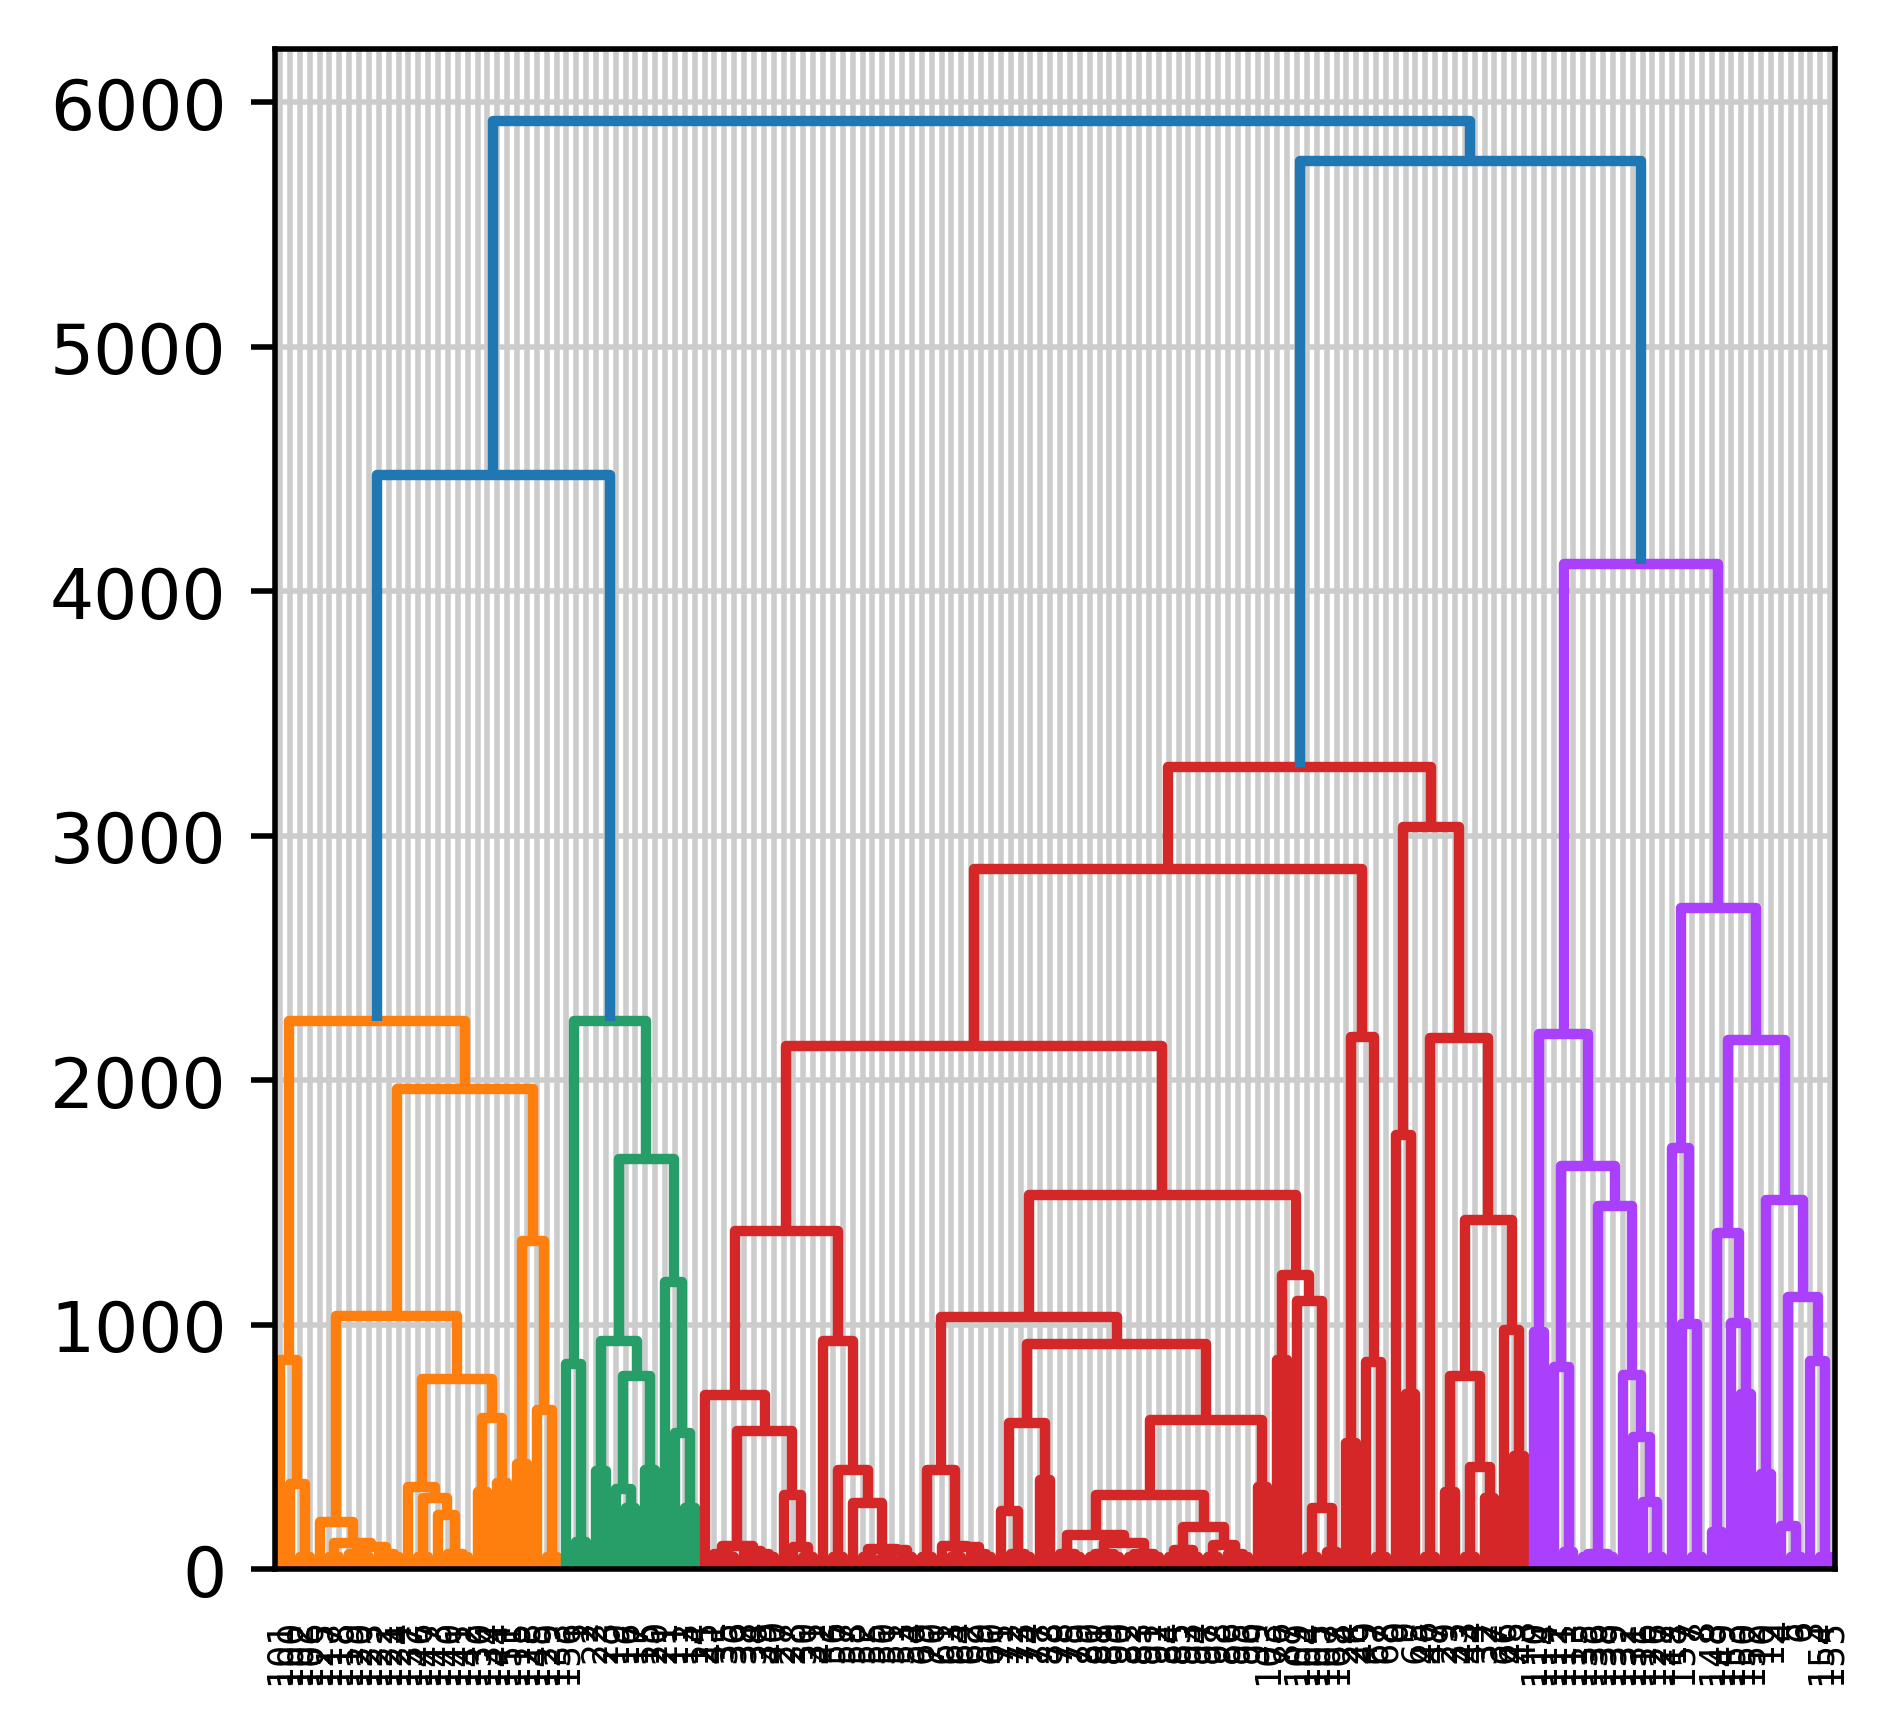

In [11]:
dendrogram(linkage_data)
plt.show()

In [12]:
# adjust n_clusters to relevant number of vessels
hierarchical_cluster = AgglomerativeClustering(n_clusters=85, affinity='euclidean', linkage='single')

In [13]:
labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[83  4  4 51  8  8  8 22 22 79 62 55 42 80 50 60 39 74 81 70 73 67 61 44
 57 47 54 78 10 75 10 10 63 48 11 11 11 77 11 11 11 11 49 12 12 24  5  5
 58 53 20 20 20 20 20 20 18 18 56  7  7  7  7  7  7 23 76 14 14 33 33  1
  1  1  1 32 69 27 32 32 32 32 32 32 32 32 32 59 64 32 32 32 32 32 32 32
 32 32 32 71 43 84 16 72  0  0 16  0  0 82 35  6 68  6 38 28 34  9  9  9
  9  9  9  9  9  9 19 19 26 46 36 29 52 46 17 13 13 41 13 13  3  3  3  3
 45 30 40 40  2  2 25 66 37 21 15 15 31 65]


/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
adata_aec.obs['Artery_clusters'] = labels
adata_aec.obs['Artery_clusters'] = adata_aec.obs['Artery_clusters'].astype('category')

/var/tmp/pbs.8217755.pbs/ipykernel_3406567/2590496195.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_aec.obs['Artery_clusters'] = labels
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [15]:
adata_aec.obs['Artery_clusters'].value_counts()

32    20
9      9
11     7
7      6
20     6
      ..
49     1
50     1
51     1
52     1
84     1
Name: Artery_clusters, Length: 85, dtype: int64

In [16]:
# subset for clusters > 5 bins
adata_aec.obs['Artery_clusters'].value_counts()[adata_aec.obs['Artery_clusters'].value_counts() > 5].index.tolist()

[32, 9, 11, 7, 20]

In [17]:
adata_aec_subset = adata_aec[adata_aec.obs.Artery_clusters.isin(adata_aec.obs['Artery_clusters'].value_counts()[adata_aec.obs['Artery_clusters'].value_counts() > 5].index.tolist())]

In [18]:
adata_aec_subset.obs.Artery_clusters = adata_aec_subset.obs.Artery_clusters.astype(str).astype('category')

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [19]:
## adata_aec

In [20]:
#sc.pl.spatial(adata,color="VWF",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [21]:
#sc.pl.spatial(adata,color="GJA5",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [22]:
#del adata_aec.uns['Artery_clusters_colors']
#del adata_aec_subset.uns['Artery_clusters_colors']

In [23]:
#sc.pl.spatial(adata_aec, color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)

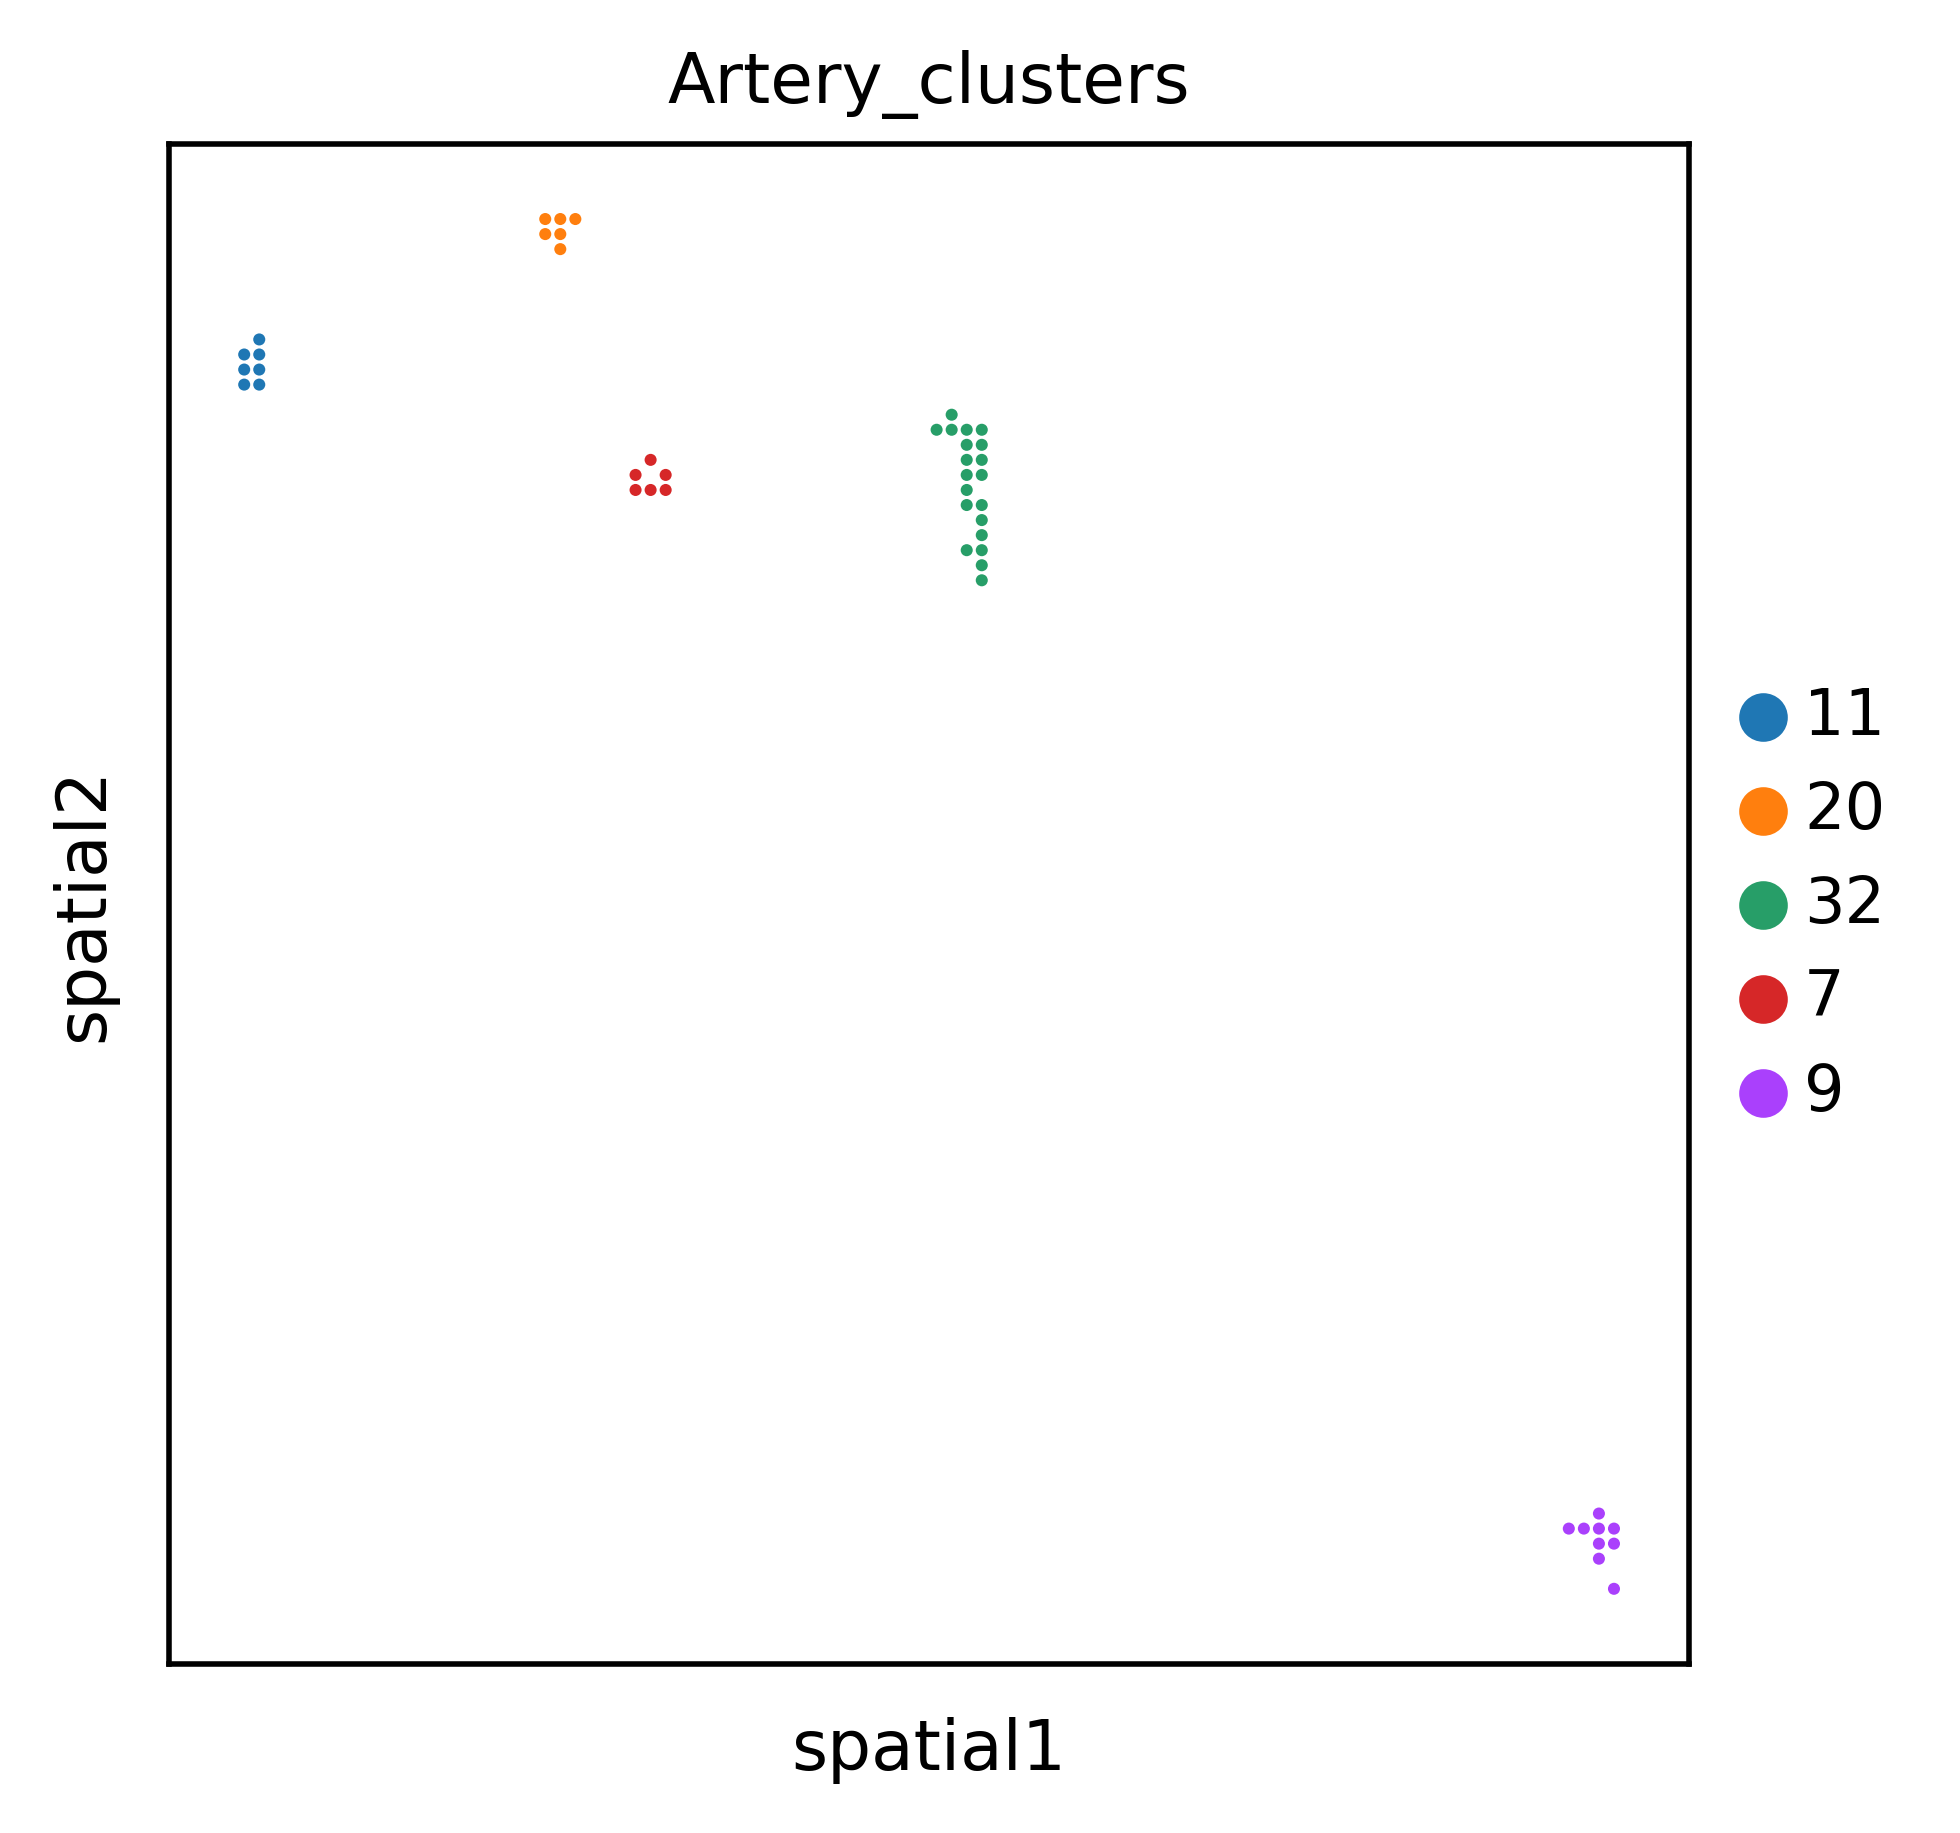

In [19]:
sc.pl.spatial(adata_aec_subset,
              color="Artery_clusters",img_key=None,size=8, alpha_img = 0.2)

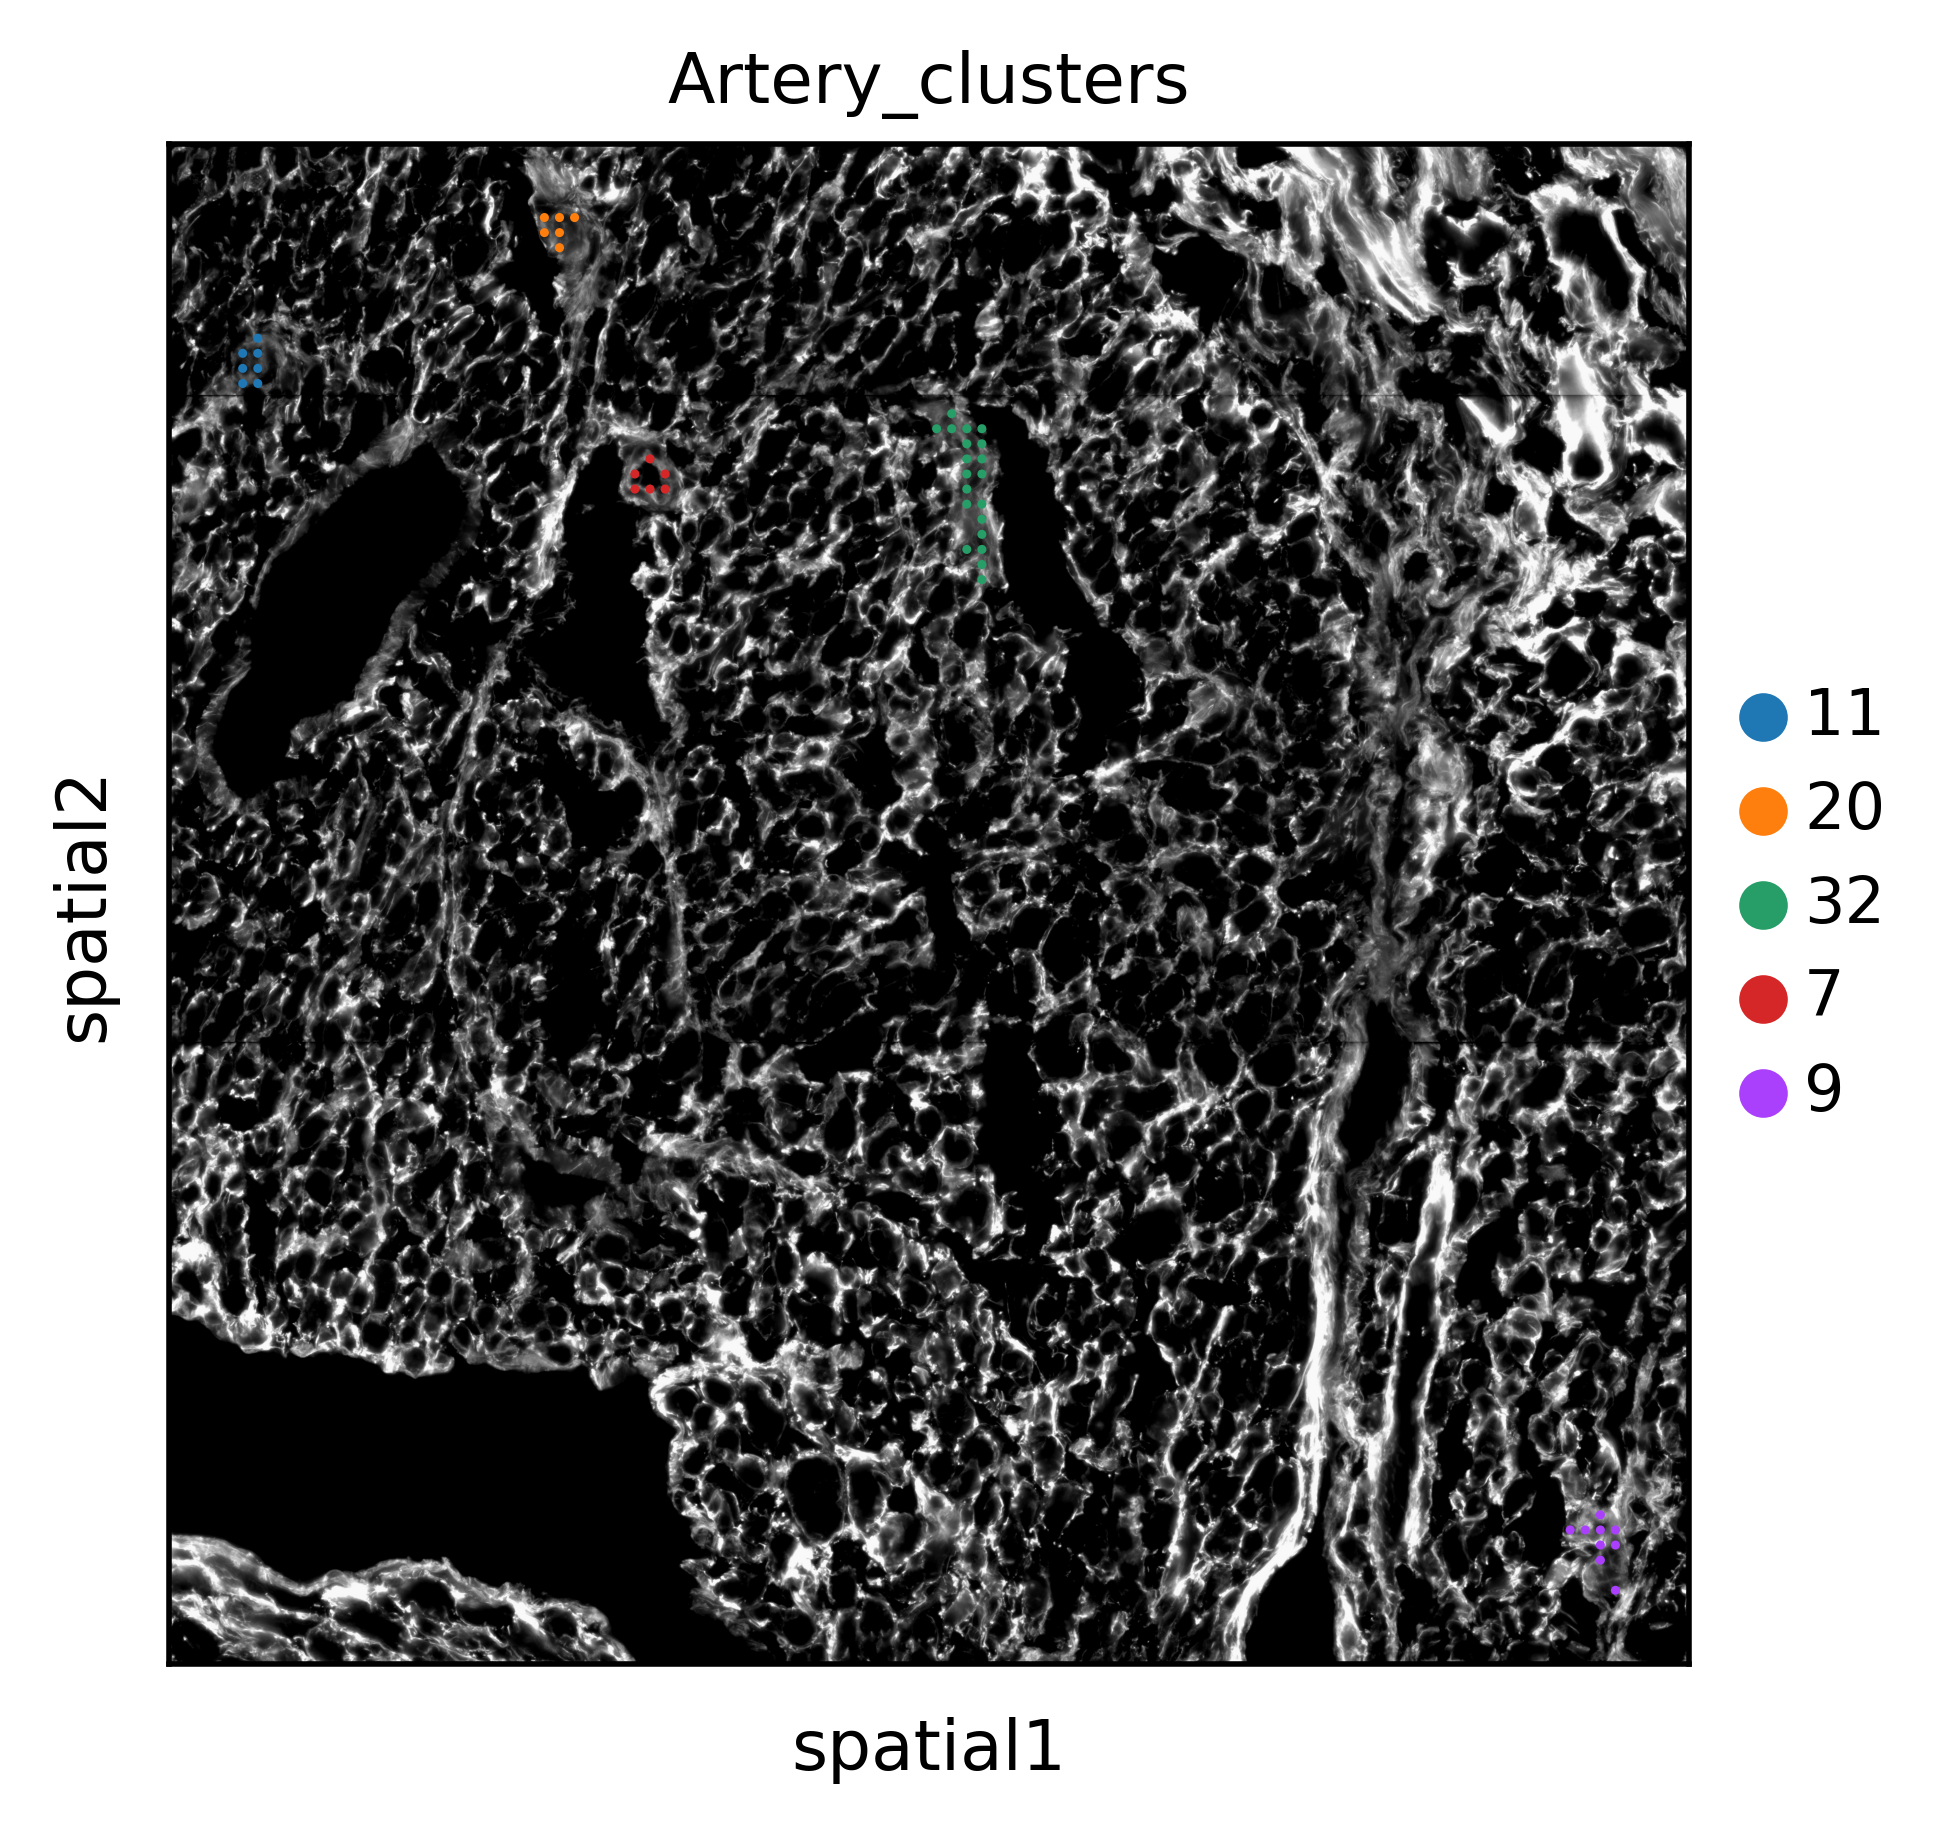

In [25]:
sc.pl.spatial(adata_aec_subset,
              color="Artery_clusters",img_key='WGA',size=6)

### obtain bins percent expressing values

In [20]:
adata_aec_subset.obs['SULF1_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SULF1'] > 1)

In [21]:
adata_aec_subset.obs['NEBL_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='NEBL'] > 1)

In [22]:
adata_aec_subset.obs['SEMA3G_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SEMA3G'] > 0)

In [23]:
adata_aec_subset.obs['RGCC_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='RGCC'] > 0)

In [24]:
adata_aec_subset.obs['SULF1+NEBL_percent'] = (adata_aec_subset.X[:,adata_aec_subset.var_names=='SULF1'] > 1) & (adata_aec_subset.X[:,adata_aec_subset.var_names=='NEBL'] > 1)

In [25]:
adata_aec_subset

AnnData object with n_obs × n_vars = 48 × 98
    obs: 'X_Y_bins', 'X_coor', 'Y_coor', 'arterial_ec', 'Artery_clusters', 'SULF1_percent', 'NEBL_percent', 'SEMA3G_percent', 'RGCC_percent', 'SULF1+NEBL_percent'
    var: 'Genes'
    uns: 'spatial', 'Artery_clusters_colors'
    obsm: 'spatial'

In [26]:
results = adata_aec_subset.obs[['SULF1+NEBL_percent','SULF1_percent','NEBL_percent','SEMA3G_percent','RGCC_percent','Artery_clusters']].groupby('Artery_clusters').mean()

In [27]:
results

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent  
Artery_clusters                                
11                     0.428571      0.428571  
20                     0.500000      0.500000  
32                     0.400000      0.100000  
7                      0.500000      0.166667  
9                      0.444444      0.000000

### obtain mean expression (all bins / cluster)

In [28]:
matrix=pd.DataFrame(adata_aec_subset.X,columns=adata_aec_subset.raw.var.index,index=adata_aec_subset.obs.index)

In [29]:
matrix["Artery_clusters"] = adata_aec_subset.obs["Artery_clusters"]

In [30]:
df_mean=matrix.groupby("Artery_clusters").mean()

In [31]:
df_mean[["SULF1","NEBL","SEMA3G","RGCC"]]

Genes               SULF1      NEBL    SEMA3G      RGCC
Artery_clusters                                        
11               0.000000  0.285714  0.428571  0.571429
20               0.333333  0.000000  0.833333  0.666667
32               0.200000  0.300000  0.500000  0.100000
7                0.333333  0.333333  0.666667  0.166667
9                0.000000  0.000000  0.666667  0.000000

### obtain mean expression (expressing bins only / cluster)

In [32]:
matrix2 = matrix.replace(0, np.NaN)

In [33]:
df_mean_nonzero =matrix2.groupby("Artery_clusters").mean()

In [34]:
df_mean_nonzero[["SULF1","NEBL","SEMA3G","RGCC"]]

Genes               SULF1  NEBL    SEMA3G      RGCC
Artery_clusters                                    
11                    NaN   1.0  1.000000  1.333333
20               1.000000   NaN  1.666667  1.333333
32               1.333333   1.2  1.250000  1.000000
7                2.000000   2.0  1.333333  1.000000
9                     NaN   NaN  1.500000       NaN

### add expression values to dataframe

In [35]:
#mean expression (all bins / cluster)
test = pd.concat([results, df_mean[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [36]:
test

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent     SULF1      NEBL    SEMA3G  \
Artery_clusters                                                               
11                     0.428571      0.428571  0.000000  0.285714  0.428571   
20                     0.500000      0.500000  0.333333  0.000000  0.833333   
32                     0.400000      0.100000  0.200000  0.300000  0.500000   
7                      0.500000      0.166667  0.333333  0.333333  0.666667   
9                      0.444444      0.000000  0.000000  0.000000  0.666667   

                     RGCC  
Artery_clusters            
11               0.571429  
20               0.666667  
32               0.100000  
7                0.166667  
9                0.000000

In [37]:
#mean expression (expressing bins only / cluster)
test2 = pd.concat([results, df_mean_nonzero[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [38]:
test2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent     SULF1  NEBL    SEMA3G  \
Artery_clusters                                                           
11                     0.428571      0.428571       NaN   1.0  1.000000   
20                     0.500000      0.500000  1.000000   NaN  1.666667   
32                     0.400000      0.100000  1.333333   1.2  1.250000   
7                      0.500000      0.166667  2.000000   2.0  1.333333   
9                      0.444444      0.000000       NaN   NaN  1.500000   

                     RGCC  
Artery_clusters            
11               1.333333  
20               1.333333  
32               1.000000  
7                1.000000  
9                     NaN

In [39]:
test2.rename(columns={"SULF1": "SULF1_mean", "NEBL": "NEBL_mean", "SEMA3G": "SEMA3G_mean", "RGCC": "RGCC_mean"}, inplace = True)

In [40]:
test2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
11                     0.428571      0.428571         NaN        1.0   
20                     0.500000      0.500000    1.000000        NaN   
32                     0.400000      0.100000    1.333333        1.2   
7                      0.500000      0.166667    2.000000        2.0   
9                      0.444444      0.000000         NaN        NaN   

                 SEMA3G_mean  RGCC_mean  
Artery_clusters                          
11                  1.000000   1.333333  
20                  1.666667   1.333333  
32                  1.250000   1.000000  
7                   1.333333   1.000000  
9                   1.500000        NaN

## add raw values

In [41]:
df_sum=matrix.groupby("Artery_clusters").sum()

In [42]:
df_sum[["SULF1","NEBL","SEMA3G","RGCC","GJA5"]]

Genes            SULF1  NEBL  SEMA3G  RGCC   GJA5
Artery_clusters                                  
11                 0.0   2.0     3.0   4.0   38.0
20                 2.0   0.0     5.0   4.0   18.0
32                 4.0   6.0    10.0   2.0  105.0
7                  2.0   2.0     4.0   1.0   32.0
9                  0.0   0.0     6.0   0.0   41.0

In [43]:
test3 = pd.concat([test2, df_sum[["SULF1","NEBL","SEMA3G","RGCC"]]], axis = 1)

In [44]:
test3

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
11                     0.428571      0.428571         NaN        1.0   
20                     0.500000      0.500000    1.000000        NaN   
32                     0.400000      0.100000    1.333333        1.2   
7                      0.500000      0.166667    2.000000        2.0   
9                      0.444444      0.000000         NaN        NaN   

                 SEMA3G_mean  RGCC_mean  SULF1  NEBL  SEMA3G  RGCC  
Artery_clusters                                                     
11                  1.000000   1.333333    0.0   2.0     3.0   4.0  
20                  1.666667   1.333333    2.0   0.0     5.0   4.0  
32                  1.250000   1.000000    4.0   6.0    10.0   2.0  
7                   1.333333   1.000000    2.0   2.0     4.0   1.0  
9                   1.500000        NaN    0.0   0.0     6.0   0.0

### add cluster size (no. bins / vessel)

In [45]:
results2 = test3.join(adata_aec_subset.obs['Artery_clusters'].value_counts(), on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)

In [47]:
results2.columns = list(results2.columns[0:13]) + ['size']

In [48]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  \
Artery_clusters                                                    
11                              0.0       0.000000      0.000000   
20                              0.0       0.000000      0.000000   
32                              0.0       0.050000      0.050000   
7                               0.0       0.166667      0.166667   
9                               0.0       0.000000      0.000000   

                 SEMA3G_percent  RGCC_percent  SULF1_mean  NEBL_mean  \
Artery_clusters                                                        
11                     0.428571      0.428571         NaN        1.0   
20                     0.500000      0.500000    1.000000        NaN   
32                     0.400000      0.100000    1.333333        1.2   
7                      0.500000      0.166667    2.000000        2.0   
9                      0.444444      0.000000         NaN        NaN   

                 SEMA3G_mean  RGCC_mean  SULF1  NEBL  SEMA3G  RGCC  size  
Artery_clusters                                                           
11                  1.000000   1.333333    0.0   2.0     3.0   4.0     7  
20                  1.666667   1.333333    2.0   0.0     5.0   4.0     6  
32                  1.250000   1.000000    4.0   6.0    10.0   2.0    20  
7                   1.333333   1.000000    2.0   2.0     4.0   1.0     6  
9                   1.500000        NaN    0.0   0.0     6.0   0.0     9

### add ROI numbers

In [49]:
results2.index = ['ROI_A2-2_' + str(i) for i in results2.index.tolist()]

In [50]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  SEMA3G_percent  \
ROI_A2-2_11                 0.0       0.000000      0.000000        0.428571   
ROI_A2-2_20                 0.0       0.000000      0.000000        0.500000   
ROI_A2-2_32                 0.0       0.050000      0.050000        0.400000   
ROI_A2-2_7                  0.0       0.166667      0.166667        0.500000   
ROI_A2-2_9                  0.0       0.000000      0.000000        0.444444   

             RGCC_percent  SULF1_mean  NEBL_mean  SEMA3G_mean  RGCC_mean  \
ROI_A2-2_11      0.428571         NaN        1.0     1.000000   1.333333   
ROI_A2-2_20      0.500000    1.000000        NaN     1.666667   1.333333   
ROI_A2-2_32      0.100000    1.333333        1.2     1.250000   1.000000   
ROI_A2-2_7       0.166667    2.000000        2.0     1.333333   1.000000   
ROI_A2-2_9       0.000000         NaN        NaN     1.500000        NaN   

             SULF1  NEBL  SEMA3G  RGCC  size  
ROI_A2-2_11    0.0   2.0     3.0   4.0     7  
ROI_A2-2_20    2.0   0.0     5.0   4.0     6  
ROI_A2-2_32    4.0   6.0    10.0   2.0    20  
ROI_A2-2_7     2.0   2.0     4.0   1.0     6  
ROI_A2-2_9     0.0   0.0     6.0   0.0     9

In [51]:
results2["ROI"] = "A2-2"

In [52]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent  SEMA3G_percent  \
ROI_A2-2_11                 0.0       0.000000      0.000000        0.428571   
ROI_A2-2_20                 0.0       0.000000      0.000000        0.500000   
ROI_A2-2_32                 0.0       0.050000      0.050000        0.400000   
ROI_A2-2_7                  0.0       0.166667      0.166667        0.500000   
ROI_A2-2_9                  0.0       0.000000      0.000000        0.444444   

             RGCC_percent  SULF1_mean  NEBL_mean  SEMA3G_mean  RGCC_mean  \
ROI_A2-2_11      0.428571         NaN        1.0     1.000000   1.333333   
ROI_A2-2_20      0.500000    1.000000        NaN     1.666667   1.333333   
ROI_A2-2_32      0.100000    1.333333        1.2     1.250000   1.000000   
ROI_A2-2_7       0.166667    2.000000        2.0     1.333333   1.000000   
ROI_A2-2_9       0.000000         NaN        NaN     1.500000        NaN   

             SULF1  NEBL  SEMA3G  RGCC  size   ROI  
ROI_A2-2_11    0.0   2.0     3.0   4.0     7  A2-2  
ROI_A2-2_20    2.0   0.0     5.0   4.0     6  A2-2  
ROI_A2-2_32    4.0   6.0    10.0   2.0    20  A2-2  
ROI_A2-2_7     2.0   2.0     4.0   1.0     6  A2-2  
ROI_A2-2_9     0.0   0.0     6.0   0.0     9  A2-2

### define size group (small / large)

In [50]:
# remove undesired vessels here (i.e. at edge of frame)

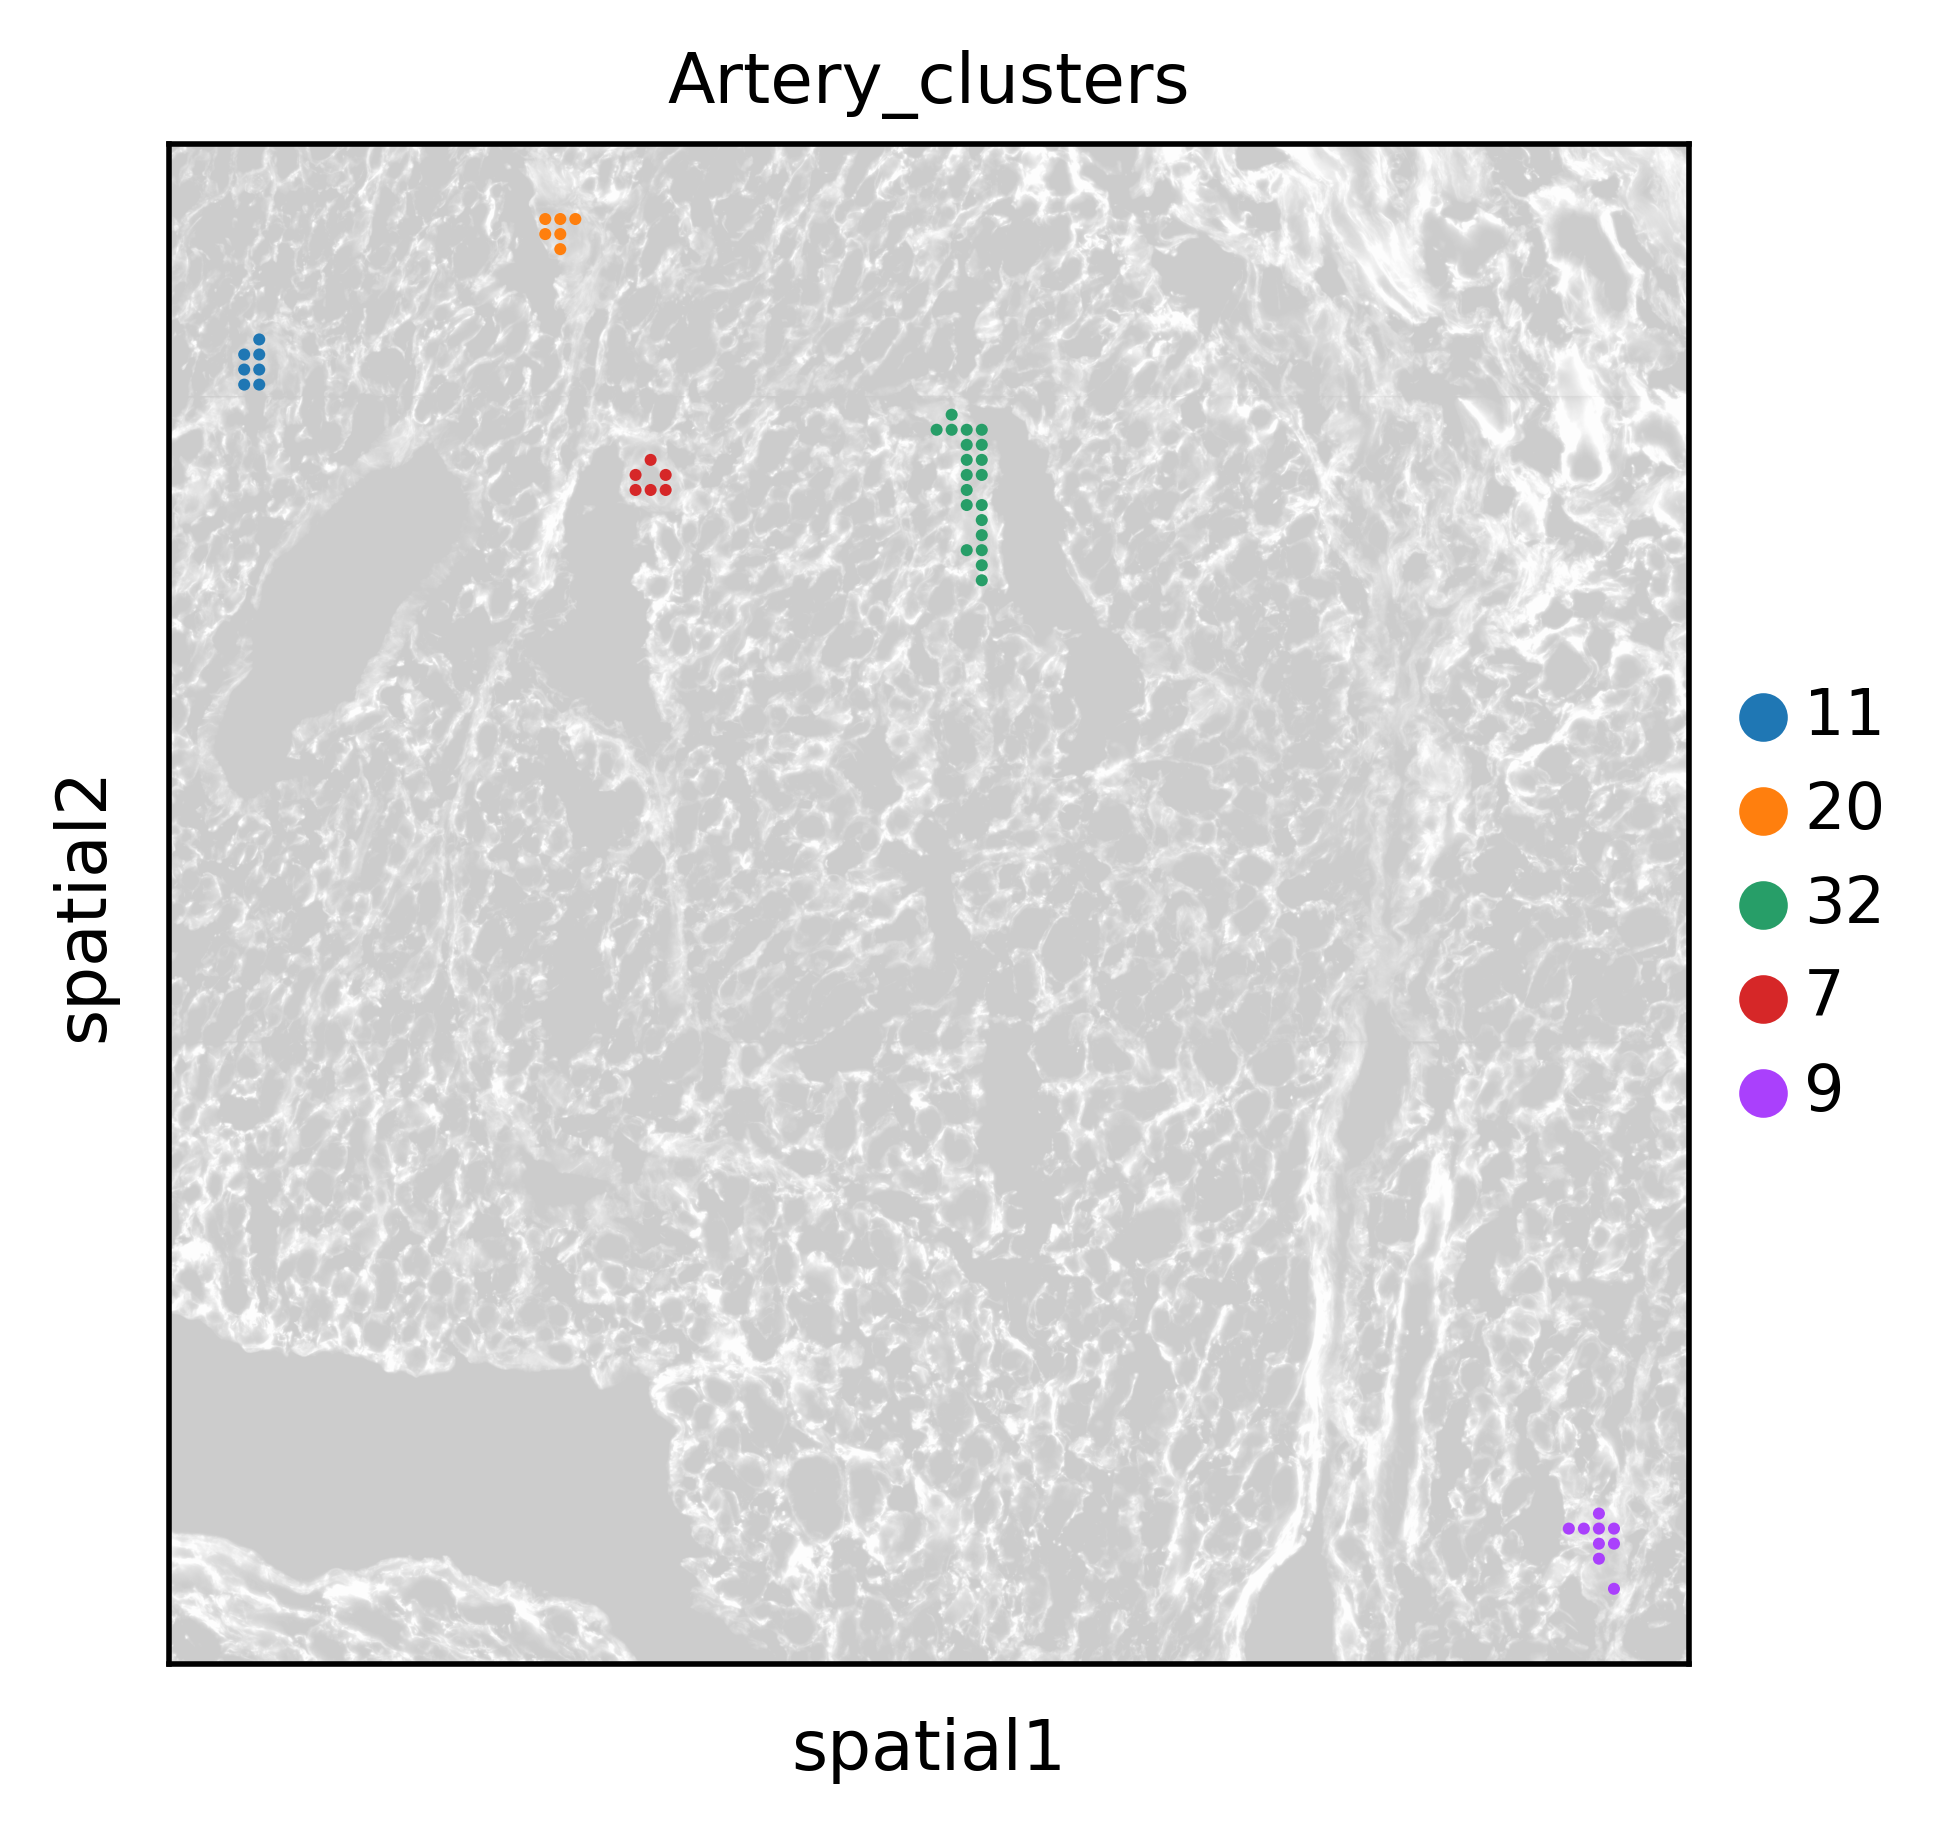

In [51]:
sc.pl.spatial(adata_aec_subset,color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)

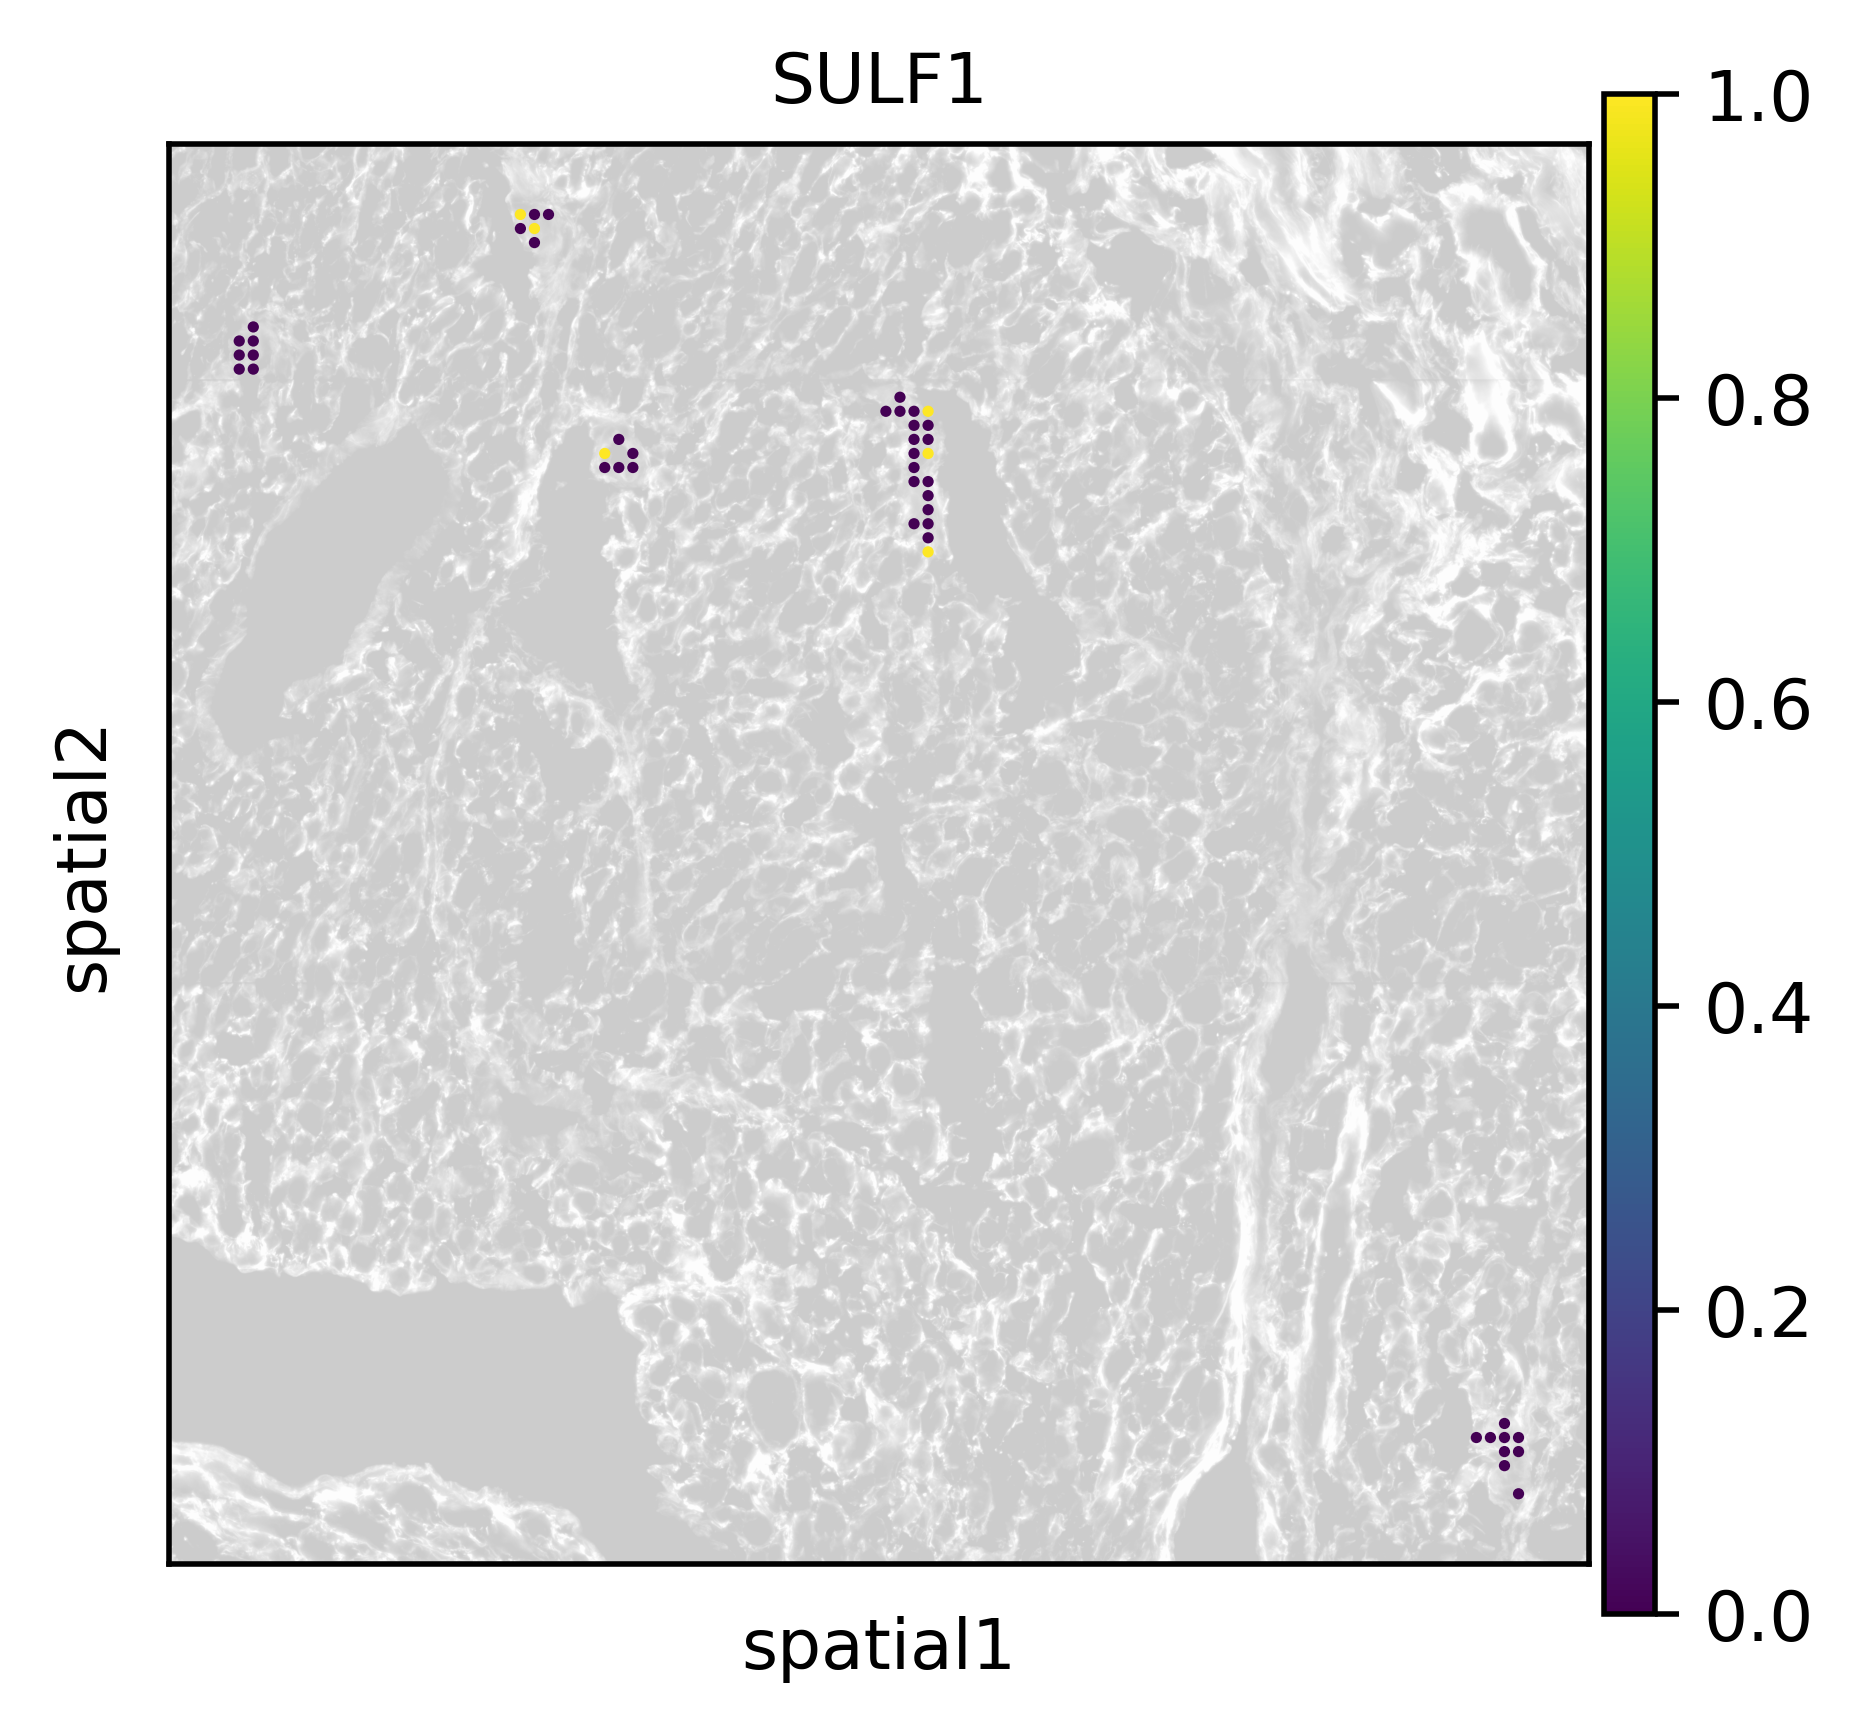

In [52]:
sc.pl.spatial(adata_aec_subset,color="SULF1",img_key='WGA',size=8, alpha_img = 0.2, vmax = 1)

In [53]:
group=pd.Series("Large", index=results2.index)

In [54]:
group[results2["size"] <= 30] = "Small"

In [55]:
group

ROI_A2-2_11    Small
ROI_A2-2_20    Small
ROI_A2-2_32    Small
ROI_A2-2_7     Small
ROI_A2-2_9     Small
dtype: object

In [56]:
results2["group"] = group

In [57]:
results2

SULF1+NEBL_percent  SULF1_percent  NEBL_percent     SULF1  NEBL  \
ROI_A2-2_11                 0.0       0.000000      0.000000       NaN   1.0   
ROI_A2-2_20                 0.0       0.000000      0.000000  1.000000   NaN   
ROI_A2-2_32                 0.0       0.050000      0.050000  1.333333   1.2   
ROI_A2-2_7                  0.0       0.166667      0.166667  2.000000   2.0   
ROI_A2-2_9                  0.0       0.000000      0.000000       NaN   NaN   

               SEMA3G      RGCC  size   ROI  group  
ROI_A2-2_11  1.000000  1.333333     7  A2-2  Small  
ROI_A2-2_20  1.666667  1.333333     6  A2-2  Small  
ROI_A2-2_32  1.250000  1.000000    20  A2-2  Small  
ROI_A2-2_7   1.333333  1.000000     6  A2-2  Small  
ROI_A2-2_9   1.500000       NaN     9  A2-2  Small

In [59]:
results2.to_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Arterial_quantification/A2-2.csv")

In [54]:
results2.to_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/Arterial_quantification/ROI_df/A2-2.csv")

In [55]:
#results2.drop(["ROI_A2-1_25"])

In [ ]:
### calculate mean / group

In [56]:
results3 = results2.groupby("group").mean()

/var/tmp/pbs.7693052.pbs/ipykernel_687706/424135287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results3 = results2.groupby("group").mean()


In [57]:
results3["ROI"] = 'A2-2'

In [58]:
results3

SULF1+NEBL_percent  SULF1_percent  NEBL_percent     SULF1  NEBL  \
group                                                                    
Small                 0.0       0.043333      0.043333  1.444445   1.4   

       SEMA3G      RGCC  size   ROI  
group                                
Small    1.35  1.166667   9.6  A2-2

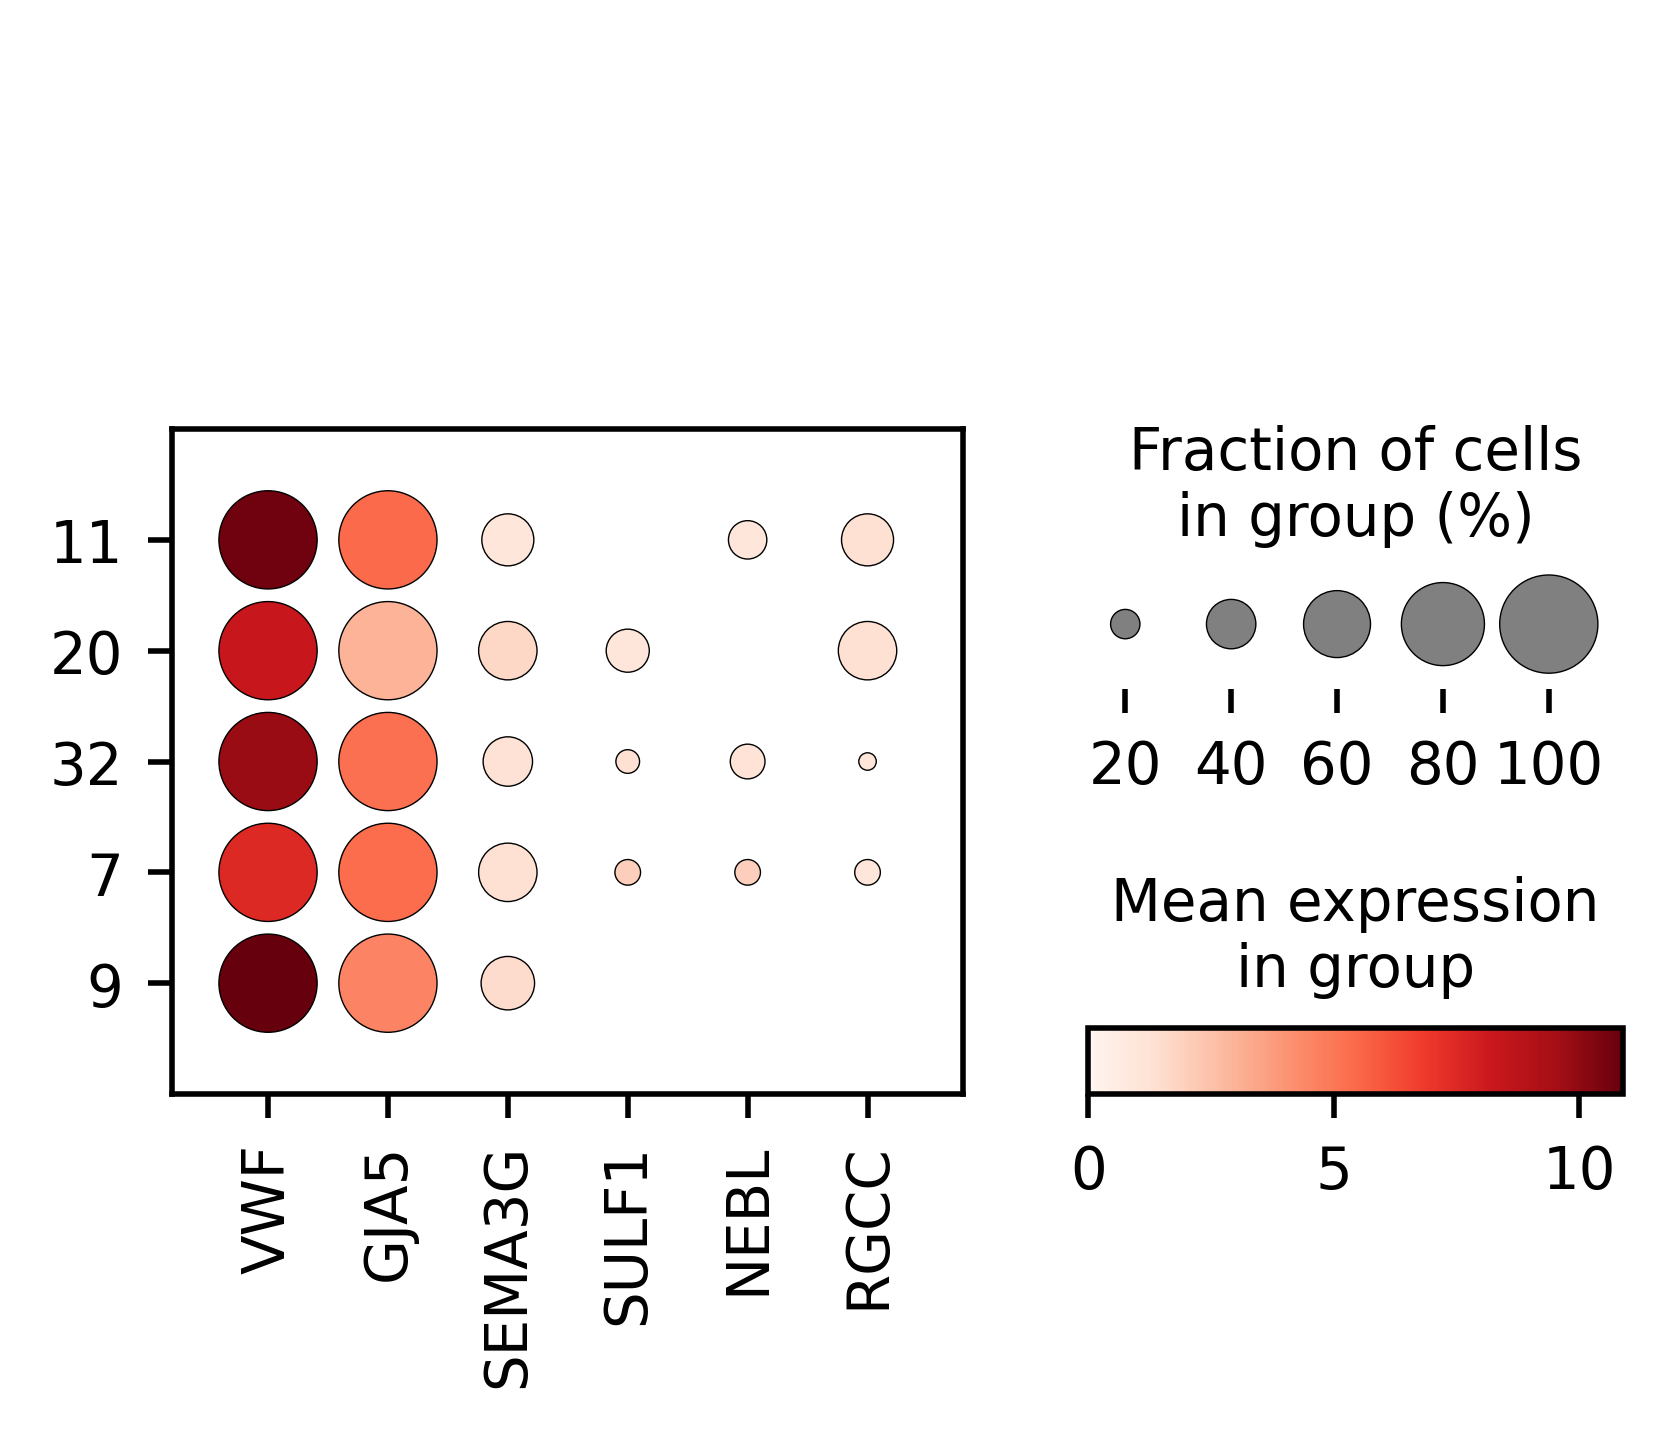

In [59]:
markers = ["VWF","GJA5","SEMA3G","SULF1","NEBL","RGCC"]
sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = True)
#sc.pl.dotplot(adata_aec_subset, markers, "Artery_clusters", mean_only_expressed = False)

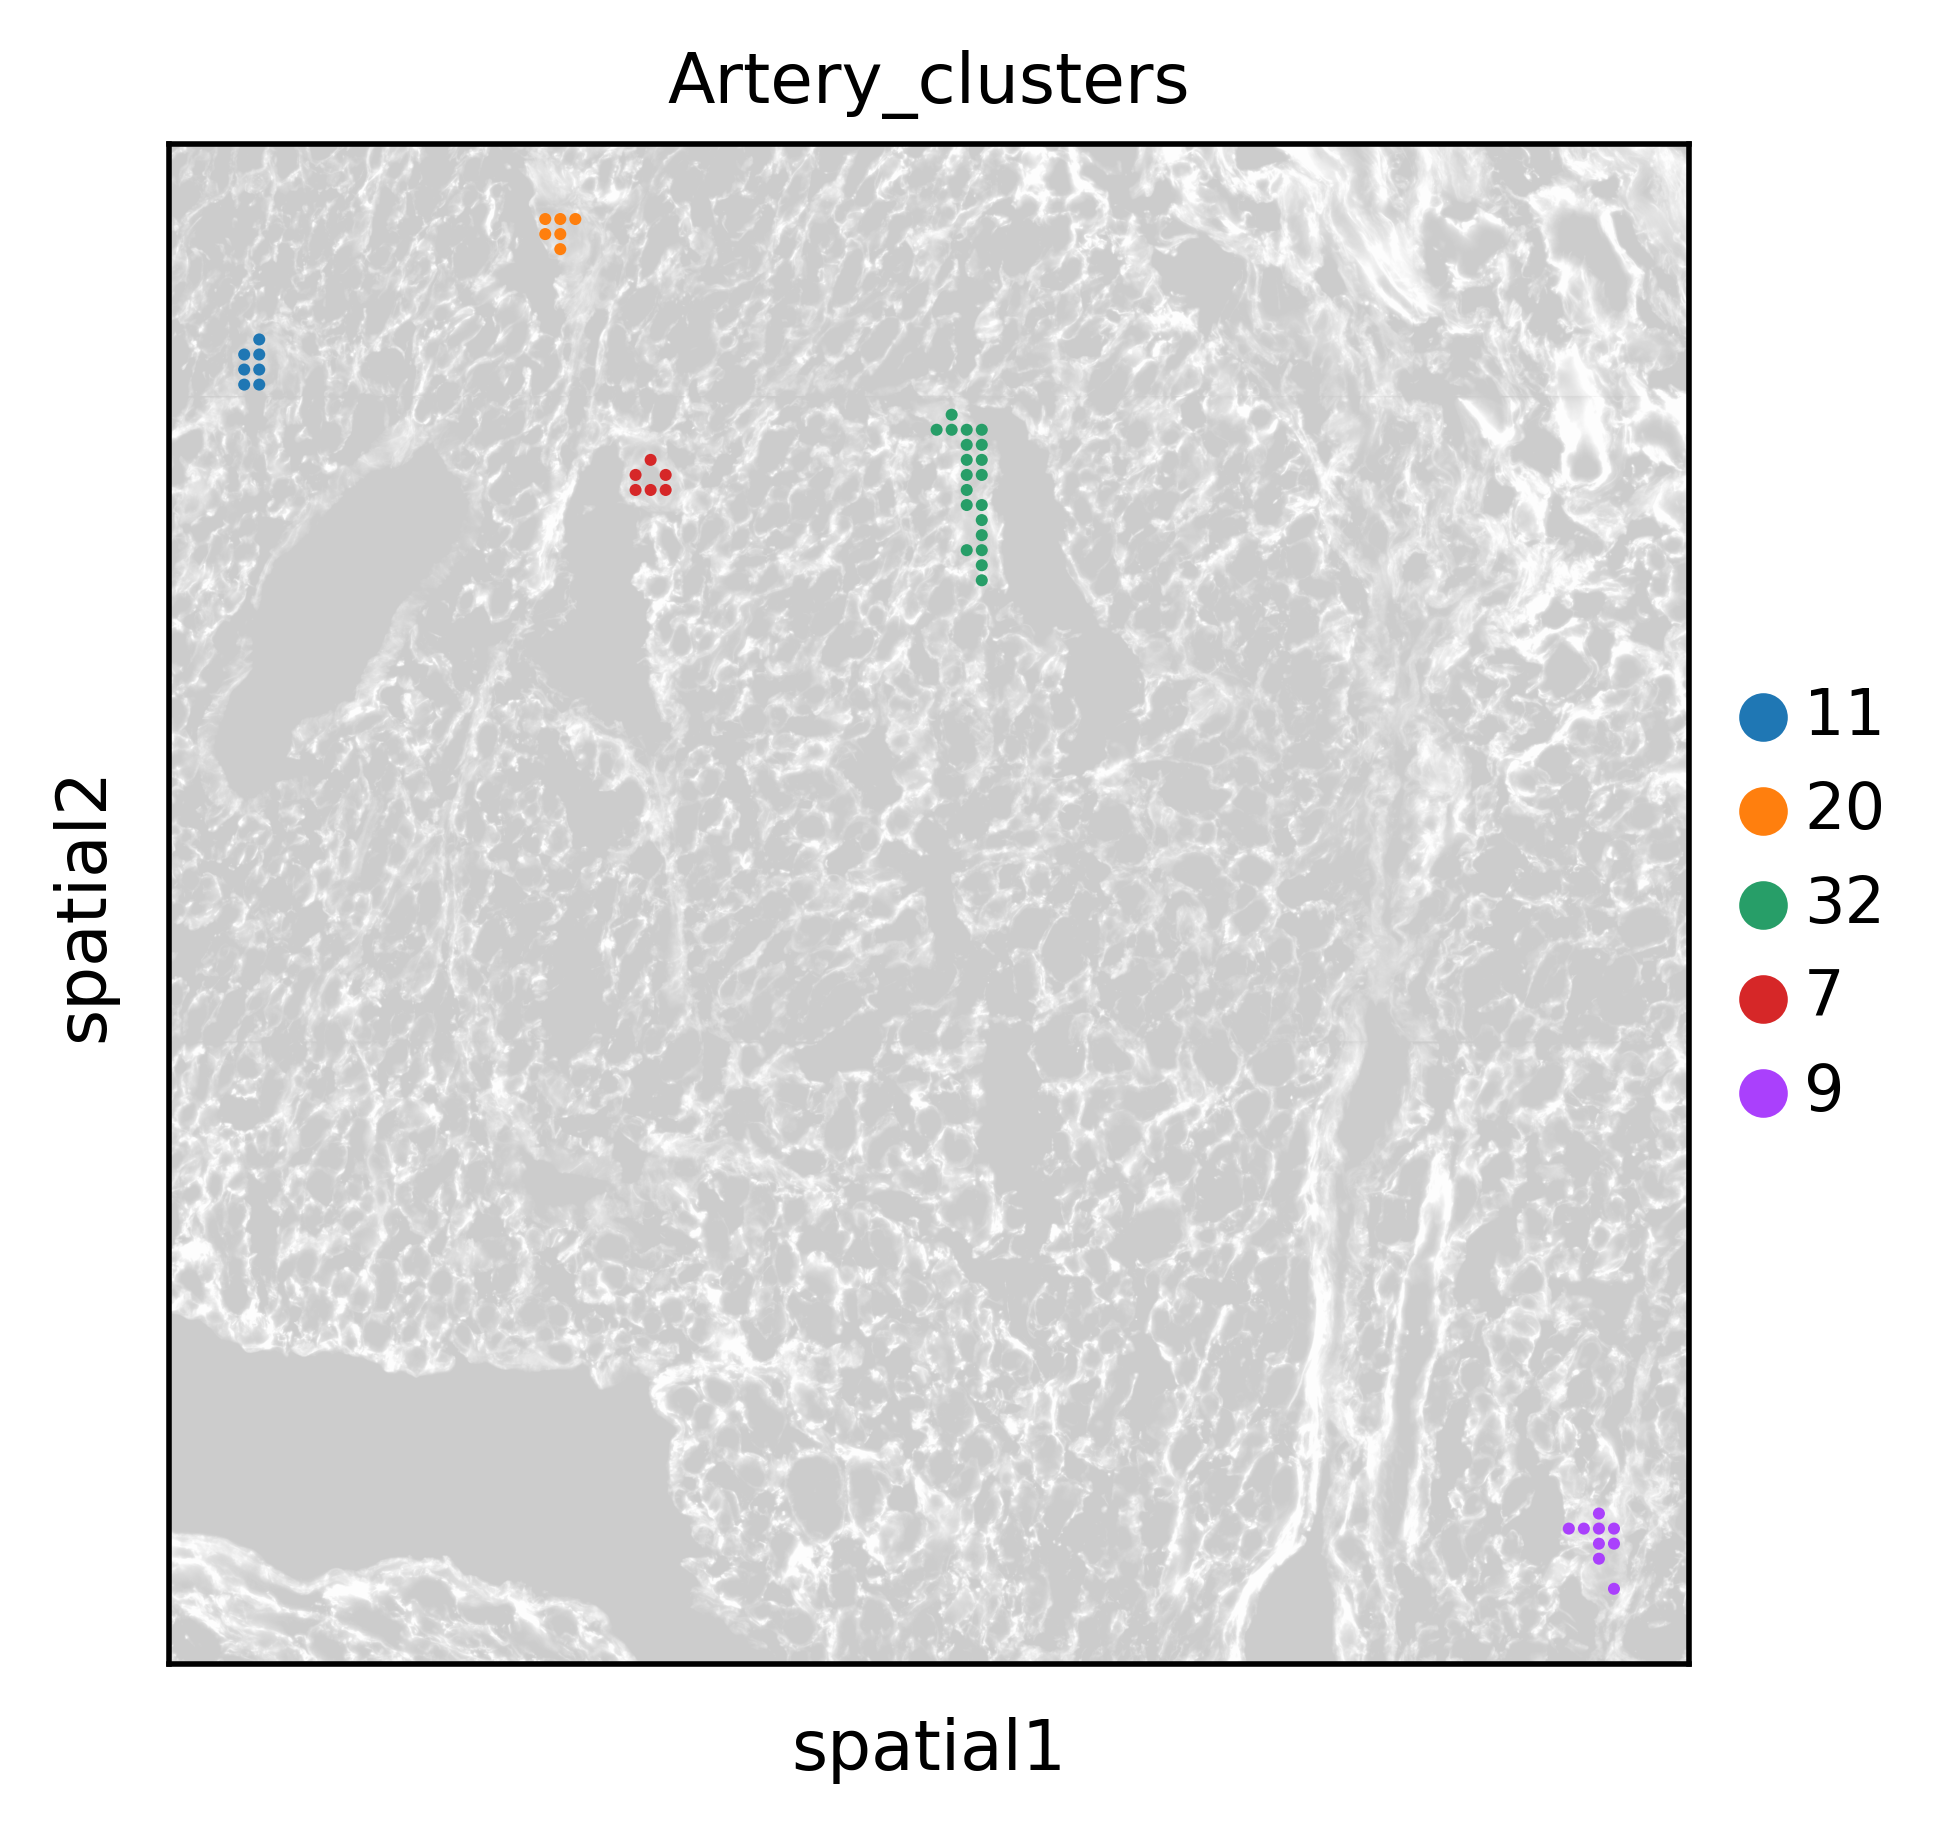

In [60]:
sc.pl.spatial(adata_aec_subset,color="Artery_clusters",img_key='WGA',size=8, alpha_img = 0.2)